In [1]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

print(x_train_full.shape, x_train_full.dtype)
print(x_test.shape, x_test.dtype)

VAL_SIZE = 4000

x_valid, x_train = x_train_full[:VAL_SIZE] / 255.0, x_train_full[VAL_SIZE:] / 255.0
y_valid, y_train = y_train_full[:VAL_SIZE], y_train_full[VAL_SIZE:]

# Перетворення 2D зображень у 1D вектори
x_train = x_train.reshape(-1, 28 * 28)
x_valid = x_valid.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Перетворення міток класів у one-hot encoding
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_valid_one_hot = keras.utils.to_categorical(y_valid, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

2024-09-06 12:11:59.520948: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-06 12:11:59.524005: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-06 12:11:59.532655: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-06 12:11:59.546639: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-06 12:11:59.550598: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-06 12:11:59.561586: I tensorflow/core/platform/cpu_feature_gu

(60000, 28, 28) uint8
(10000, 28, 28) uint8


In [2]:
class_names = [
    'T-shirt',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

class_names[y_train[0]], class_names[y_valid[0]]

('Bag', 'Ankle boot')

In [3]:
import tensorflow as tf

def create_model_relu():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(28*28,)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
def create_model_tanh():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(512, activation='tanh', input_shape=(28*28,)),
        tf.keras.layers.Dense(256, activation='tanh'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [5]:
def create_model_relu_new():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_shape=(28*28,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

def train_and_plot(model, model_name, x_train, y_train, x_valid, y_valid):
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid), batch_size=32, verbose=2)
    
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

    val_loss, val_acc = model.evaluate(x_valid, y_valid, verbose=0)
    print(f"Точність на валідаційних даних для {model_name}: {val_acc:.4f}")

/home/suphomie/uni/homeworks-labs/deep-learning-tools/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1750/1750 - 13s - 7ms/step - accuracy: 0.8273 - loss: 0.4766 - val_accuracy: 0.8572 - val_loss: 0.3957
Epoch 2/10
1750/1750 - 11s - 6ms/step - accuracy: 0.8674 - loss: 0.3582 - val_accuracy: 0.8745 - val_loss: 0.3421
Epoch 3/10
1750/1750 - 11s - 6ms/step - accuracy: 0.8811 - loss: 0.3211 - val_accuracy: 0.8823 - val_loss: 0.3368
Epoch 4/10
1750/1750 - 11s - 6ms/step - accuracy: 0.8884 - loss: 0.2983 - val_accuracy: 0.8773 - val_loss: 0.3295
Epoch 5/10
1750/1750 - 18s - 10ms/step - accuracy: 0.8949 - loss: 0.2791 - val_accuracy: 0.8870 - val_loss: 0.3145
Epoch 6/10
1750/1750 - 11s - 6ms/step - accuracy: 0.8992 - loss: 0.2657 - val_accuracy: 0.8815 - val_loss: 0.3289
Epoch 7/10
1750/1750 - 11s - 6ms/step - accuracy: 0.9037 - loss: 0.2519 - val_accuracy: 0.8850 - val_loss: 0.3355
Epoch 8/10
1750/1750 - 11s - 6ms/step - accuracy: 0.9089 - loss: 0.2408 - val_accuracy: 0.8840 - val_loss: 0.3415
Epoch 9/10
1750/1750 - 11s - 6ms/step - accuracy: 0.9122 - loss: 0.2299 - val_accuracy:

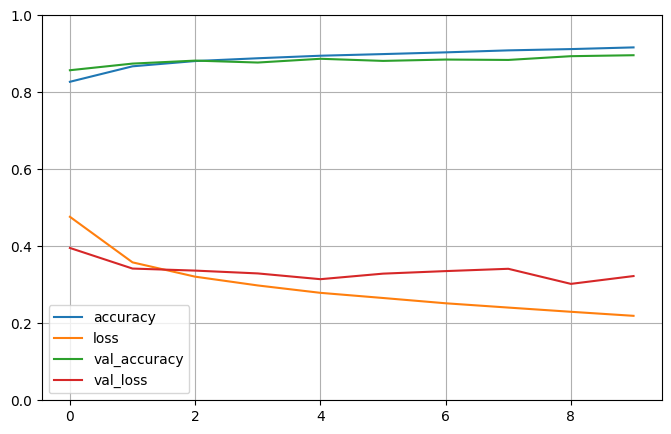

Точність на валідаційних даних для Модель 1: 0.8963


In [7]:
model_1 = create_model_relu()
train_and_plot(model_1, "Модель 1", x_train, y_train_one_hot, x_valid, y_valid_one_hot)

/home/suphomie/uni/homeworks-labs/deep-learning-tools/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1750/1750 - 13s - 7ms/step - accuracy: 0.8220 - loss: 0.4819 - val_accuracy: 0.8585 - val_loss: 0.3937
Epoch 2/10
1750/1750 - 11s - 6ms/step - accuracy: 0.8603 - loss: 0.3768 - val_accuracy: 0.8652 - val_loss: 0.3725
Epoch 3/10
1750/1750 - 11s - 6ms/step - accuracy: 0.8725 - loss: 0.3445 - val_accuracy: 0.8660 - val_loss: 0.3625
Epoch 4/10
1750/1750 - 11s - 6ms/step - accuracy: 0.8772 - loss: 0.3296 - val_accuracy: 0.8767 - val_loss: 0.3385
Epoch 5/10
1750/1750 - 11s - 6ms/step - accuracy: 0.8830 - loss: 0.3160 - val_accuracy: 0.8662 - val_loss: 0.3503
Epoch 6/10
1750/1750 - 11s - 6ms/step - accuracy: 0.8843 - loss: 0.3090 - val_accuracy: 0.8830 - val_loss: 0.3267
Epoch 7/10
1750/1750 - 11s - 6ms/step - accuracy: 0.8884 - loss: 0.2983 - val_accuracy: 0.8545 - val_loss: 0.3807
Epoch 8/10
1750/1750 - 11s - 6ms/step - accuracy: 0.8920 - loss: 0.2866 - val_accuracy: 0.8760 - val_loss: 0.3548
Epoch 9/10
1750/1750 - 11s - 6ms/step - accuracy: 0.8927 - loss: 0.2863 - val_accuracy: 

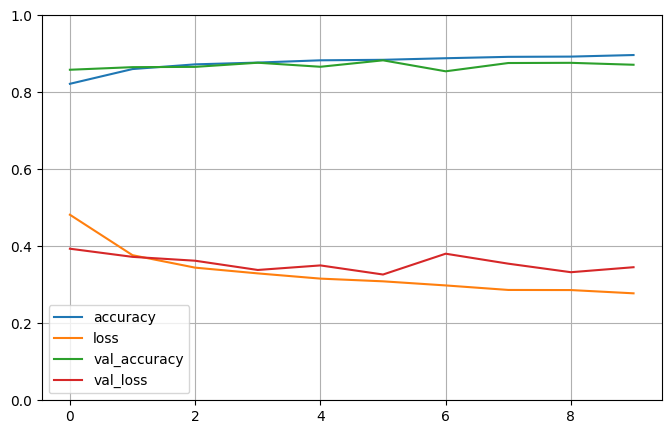

Точність на валідаційних даних для Модель 2: 0.8715


In [8]:
model_2 = create_model_tanh()
train_and_plot(model_2, "Модель 2", x_train, y_train_one_hot, x_valid, y_valid_one_hot)

/home/suphomie/uni/homeworks-labs/deep-learning-tools/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1750/1750 - 10s - 6ms/step - accuracy: 0.8244 - loss: 0.4904 - val_accuracy: 0.8460 - val_loss: 0.4217
Epoch 2/10
1750/1750 - 8s - 4ms/step - accuracy: 0.8646 - loss: 0.3695 - val_accuracy: 0.8733 - val_loss: 0.3562
Epoch 3/10
1750/1750 - 8s - 4ms/step - accuracy: 0.8781 - loss: 0.3317 - val_accuracy: 0.8708 - val_loss: 0.3436
Epoch 4/10
1750/1750 - 8s - 4ms/step - accuracy: 0.8863 - loss: 0.3083 - val_accuracy: 0.8827 - val_loss: 0.3204
Epoch 5/10
1750/1750 - 8s - 4ms/step - accuracy: 0.8929 - loss: 0.2883 - val_accuracy: 0.8767 - val_loss: 0.3487
Epoch 6/10
1750/1750 - 8s - 4ms/step - accuracy: 0.8968 - loss: 0.2751 - val_accuracy: 0.8800 - val_loss: 0.3368
Epoch 7/10
1750/1750 - 8s - 4ms/step - accuracy: 0.9024 - loss: 0.2628 - val_accuracy: 0.8895 - val_loss: 0.3123
Epoch 8/10
1750/1750 - 8s - 4ms/step - accuracy: 0.9060 - loss: 0.2496 - val_accuracy: 0.8857 - val_loss: 0.3246
Epoch 9/10
1750/1750 - 8s - 4ms/step - accuracy: 0.9099 - loss: 0.2396 - val_accuracy: 0.8898 -

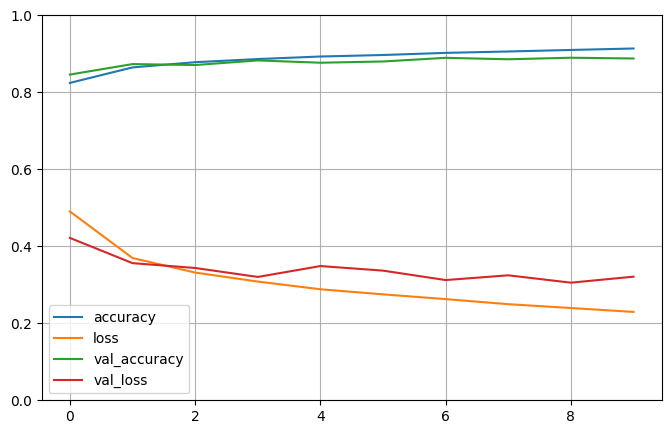

Точність на валідаційних даних для Модель 3: 0.8878


In [9]:
model_3 = create_model_relu_new()
train_and_plot(model_3, "Модель 3", x_train, y_train_one_hot, x_valid, y_valid_one_hot)

In [10]:
from sklearn.metrics import classification_report
import numpy as np

def classification_report_for_model(model, model_name):
    y_pred = model.predict(x_test)
    y_true = np.argmax(y_test_one_hot, axis=1)
    
    print(f"Звіт по класифікації для {model_name}:")
    print(classification_report(y_true, class_names))

In [11]:
classification_report_for_model(model_1, "Модель 1")
classification_report_for_model(model_2, "Модель 2")
classification_report_for_model(model_3, "Модель 3")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Звіт по класифікації для Модель 1:


ValueError: Found input variables with inconsistent numbers of samples: [10000, 10]